In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import tensorflow as tf

In [3]:
import json

Dataset Source:
https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

In [4]:
data = pd.read_csv(r"heart.csv")

In [5]:
data.duplicated().value_counts()

False    918
True     272
Name: count, dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [9]:
data.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [10]:
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', ]
continuous_features = [ col for col in data.columns.to_list()[1:-1] if col not in categorical_features ]

In [11]:
target = 'target'

In [12]:
print(f'Categorical Features: {len(categorical_features)}\nContinuous Features: {len(continuous_features)}')

Categorical Features: 6
Continuous Features: 4


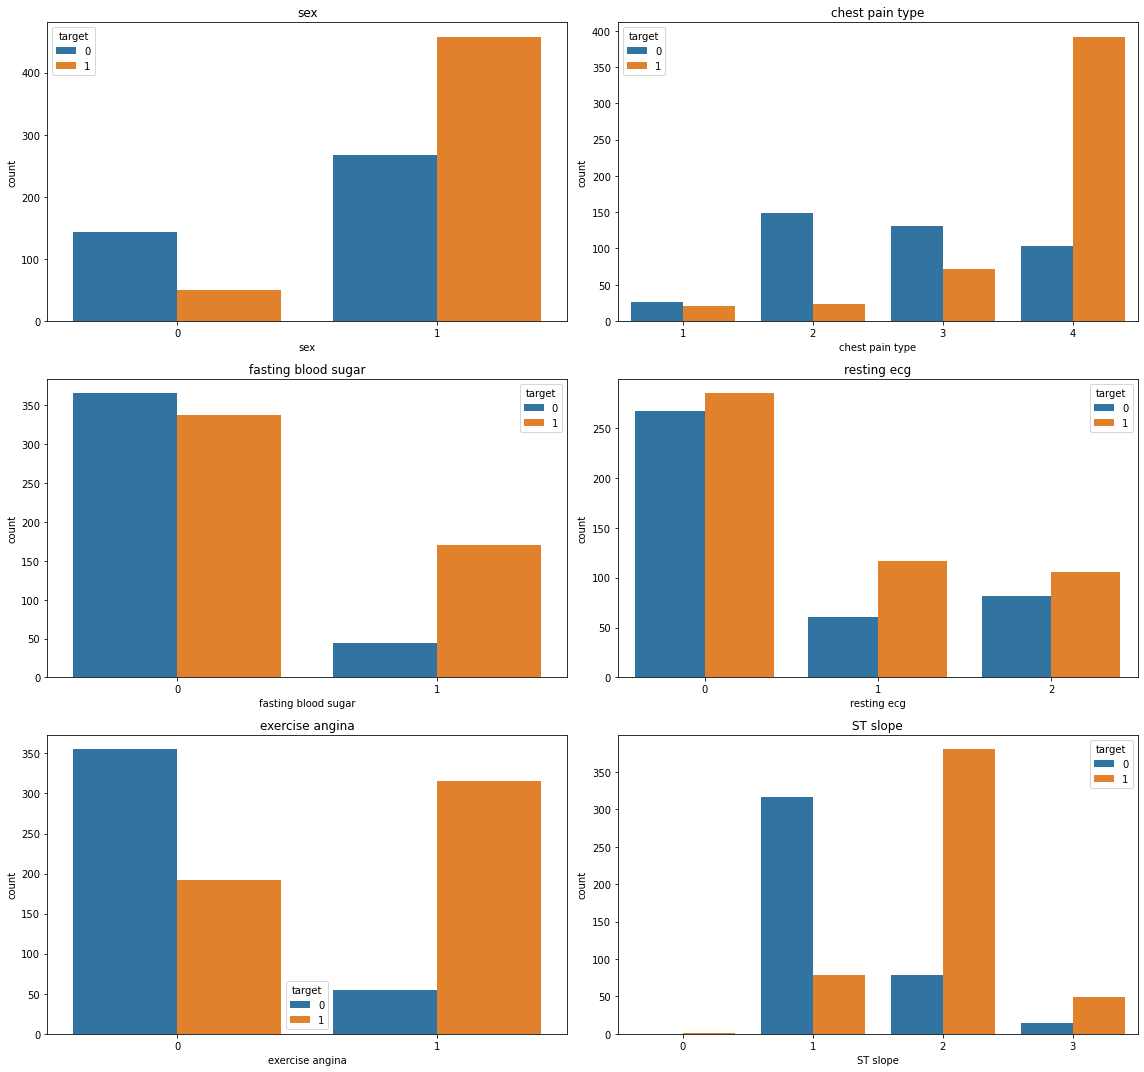

In [13]:
fig, axes = plt.subplots(
                nrows=3,
                ncols=2,
                figsize=(16, 15),
            )

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i], hue=target, )
    axes[i].set_title(feature)
    
plt.tight_layout()
plt.show()

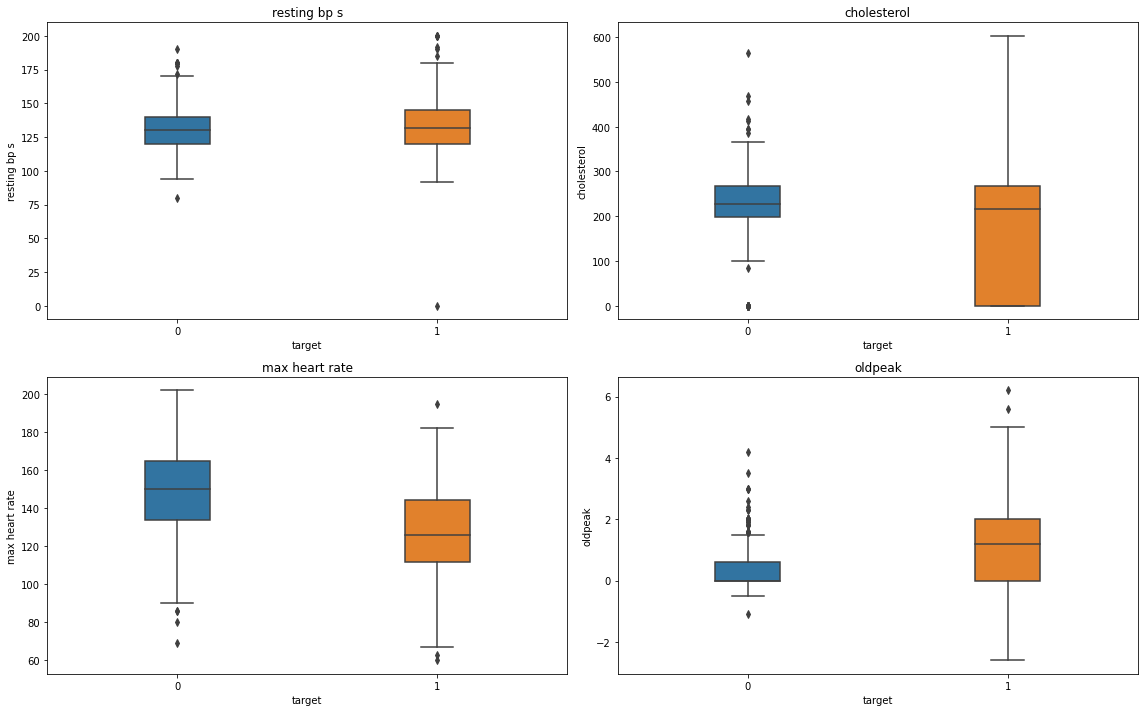

In [14]:
fig, axes = plt.subplots(
                nrows=2, 
                ncols=2, 
                figsize=(16, 10)
            )

axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=data, x=target, y=feature, ax=axes[i], width=0.25)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data[categorical_features + continuous_features]
y = data[target]

_X_train, X_test, _y_train, y_test = train_test_split(X, y, train_size=0.88, random_state=1, shuffle=True, stratify=y)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', OneHotEncoder(), categorical_features),
                        ('num', StandardScaler(), continuous_features)
                    ]
                )

_X_train = preprocessor.fit_transform(_X_train)
X_test = preprocessor.transform(X_test)

In [16]:
from sklearn.metrics import make_scorer, accuracy_score

def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

error_rate_scorer = make_scorer(error_rate)

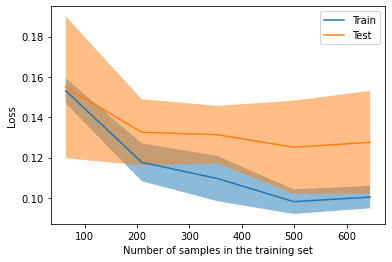

In [17]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

knn = KNeighborsClassifier()

train_sizes, train_scores, test_scores = learning_curve(knn, _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Loss"
)

display.plot()

plt.show()

In [18]:
from sklearn.model_selection import ParameterGrid, ValidationCurveDisplay, validation_curve


grid_params = ParameterGrid(
    {
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
)

grid_params = list(grid_params)

range_params = {
    'n_neighbors': np.linspace(1, 30, 30).astype(int),
    'leaf_size': np.linspace(10, 80, 8).astype(int)
}

In [19]:
validation_results = []

for gp in grid_params:
    
    print(f"Running {json.dumps(gp)}")
    
    for rp in range_params.keys():
        knn = KNeighborsClassifier(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            knn, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=error_rate_scorer,
            error_score='raise'
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

Running {"p": 1, "weights": "uniform"}
Running {"p": 1, "weights": "distance"}
Running {"p": 2, "weights": "uniform"}
Running {"p": 2, "weights": "distance"}


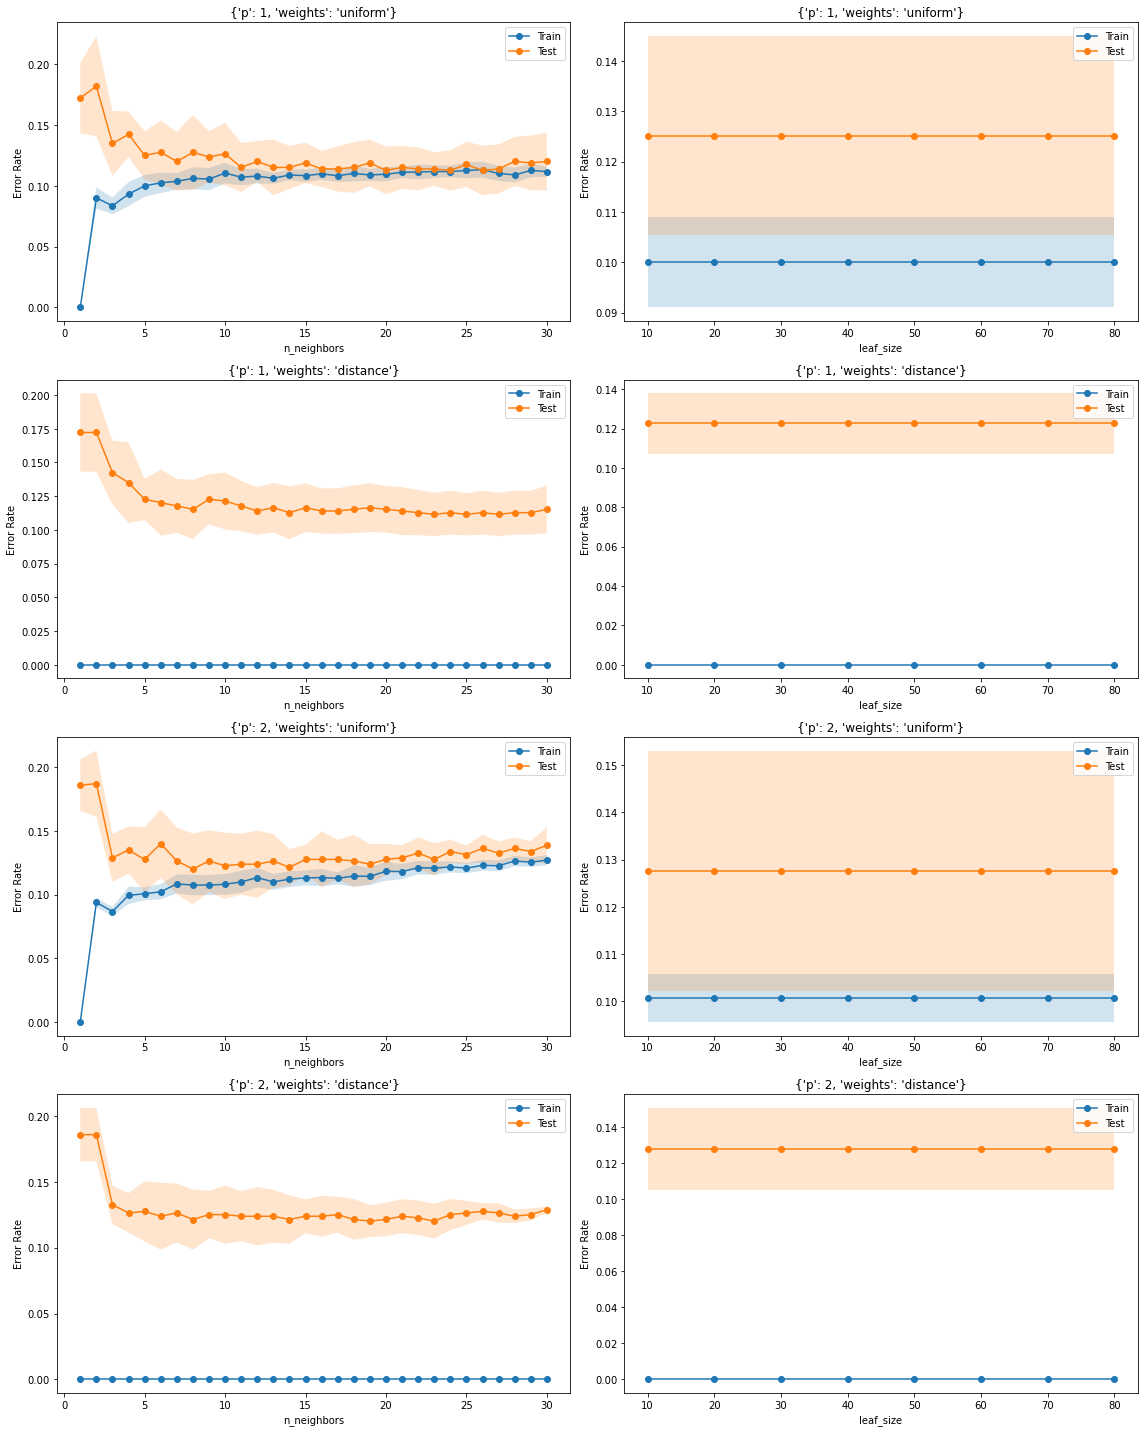

In [20]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(f"{results['gp']}")
    ax.set_xlabel(f"{results['rp']}")
    ax.set_ylabel('Error Rate')
    ax.legend()

plt.tight_layout()
plt.show()

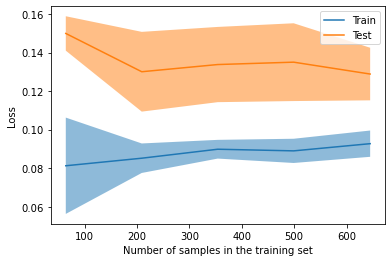

In [21]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

svc = SVC()

train_sizes, train_scores, test_scores = learning_curve(svc, _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Loss"
)

display.plot()

plt.show()

In [22]:
grid_params = list(ParameterGrid({'kernel': ['linear', 'rbf', 'sigmoid']})) + list(ParameterGrid({'kernel': ['poly'], 'degree': list(range(3, 6))}))

range_params = {
    'C': np.power(10, np.linspace(-3, 3, 7)),
    'gamma': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
}

In [23]:
grid_params

[{'kernel': 'linear'},
 {'kernel': 'rbf'},
 {'kernel': 'sigmoid'},
 {'degree': 3, 'kernel': 'poly'},
 {'degree': 4, 'kernel': 'poly'},
 {'degree': 5, 'kernel': 'poly'}]

In [24]:
validation_results = []

for gp in grid_params:
    
    for rp in range_params.keys():
        
        print(f"Running {json.dumps(gp)} - {rp}")
        
        svc = SVC(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            svc, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=error_rate_scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

Running {"kernel": "linear"} - C
Running {"kernel": "linear"} - gamma
Running {"kernel": "rbf"} - C
Running {"kernel": "rbf"} - gamma
Running {"kernel": "sigmoid"} - C
Running {"kernel": "sigmoid"} - gamma
Running {"degree": 3, "kernel": "poly"} - C
Running {"degree": 3, "kernel": "poly"} - gamma
Running {"degree": 4, "kernel": "poly"} - C
Running {"degree": 4, "kernel": "poly"} - gamma
Running {"degree": 5, "kernel": "poly"} - C
Running {"degree": 5, "kernel": "poly"} - gamma


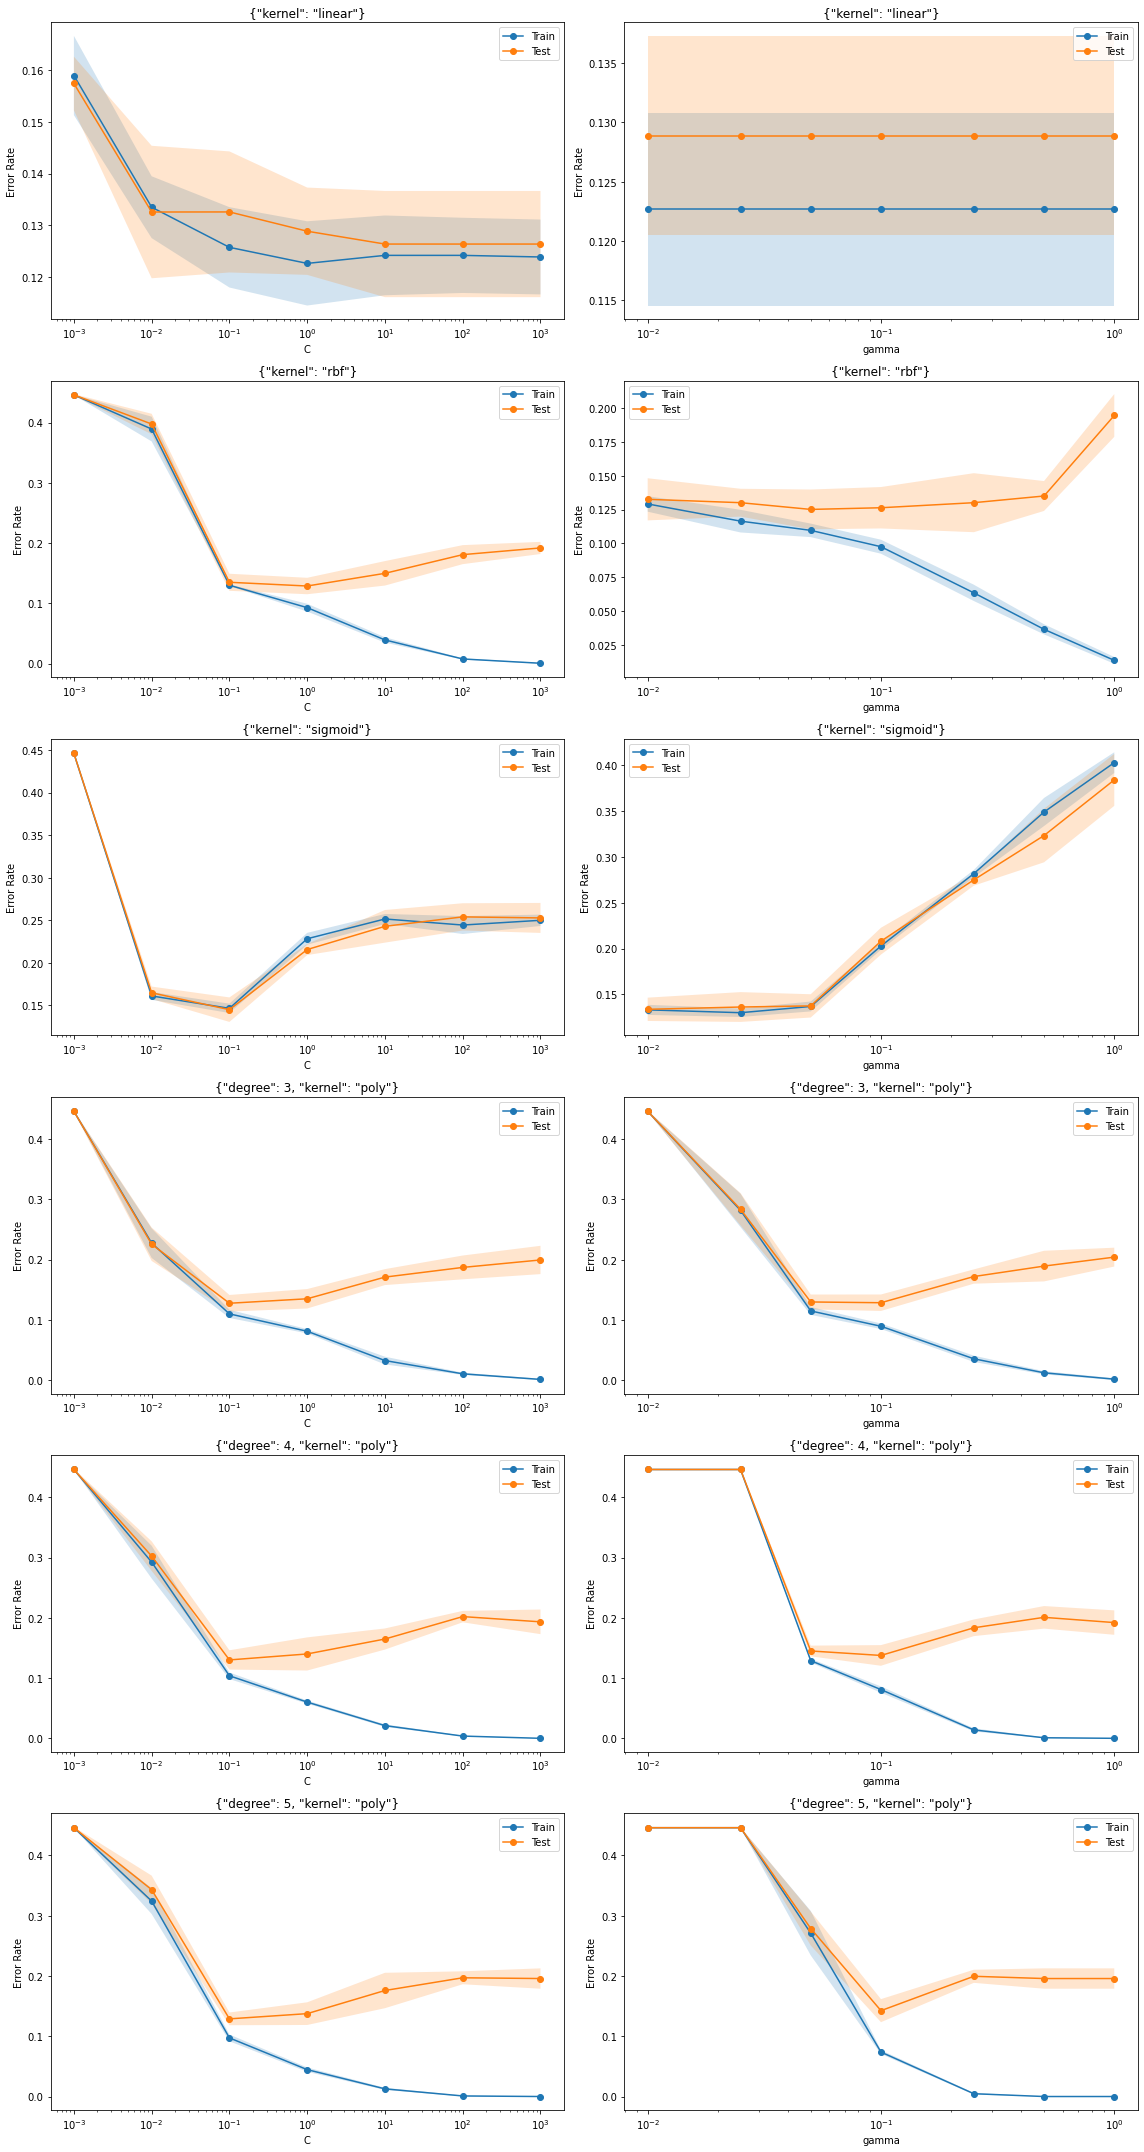

In [25]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xscale('log')
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('Error Rate')
    ax.legend()

plt.tight_layout()
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

learning_all = []

training_sizes = np.linspace(0.1, 0.9, 9)

# Perform grid search
for size in training_sizes:
    
    train_losses = []
    val_losses = []

    train_accuracies = []
    val_accuracies = []

    subset_size = int(len(_X_train) * size)
    _X_train_subset = _X_train[:subset_size]
    _y_train_subset = _y_train[:subset_size]
    
    _X_train_subset = pd.DataFrame(_X_train_subset)
    _y_train_subset = pd.DataFrame(_y_train_subset)
    
    for train_index, val_index in kf.split(_X_train_subset, _y_train_subset):
        X_train, X_val = _X_train_subset.iloc[train_index], _X_train_subset.iloc[val_index]
        y_train, y_val = _y_train_subset.iloc[train_index], _y_train_subset.iloc[val_index]

        # Create a model instance
        model = create_model()

        # Train the model
        history = model.fit(X_train, y_train, 
                            epochs=100, 
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            verbose=0)

        # Evaluate the model
        val_predictions = model.predict(X_val, verbose=0)

        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])

        train_accuracies.append(history.history['accuracy'])
        val_accuracies.append(history.history['val_accuracy'])

    
    learning_current = {
        'training_size': subset_size,
        
        'history':
            {
              'loss': {
                  'mean': np.mean(train_losses, axis=0),
                  'std': np.std(train_losses, axis=0)
              },
              'val_loss': {
                  'mean': np.mean(val_losses, axis=0),
                  'std': np.std(val_losses, axis=0)
              },
              'auc': {
                  'mean': np.mean(train_accuracies, axis=0),
                  'std': np.std(train_accuracies, axis=0)
              },
              'val_auc': {
                  'mean': np.mean(val_accuracies, axis=0),
                  'std': np.std(val_accuracies, axis=0)
              },
            }
        }

    learning_all.append(learning_current)

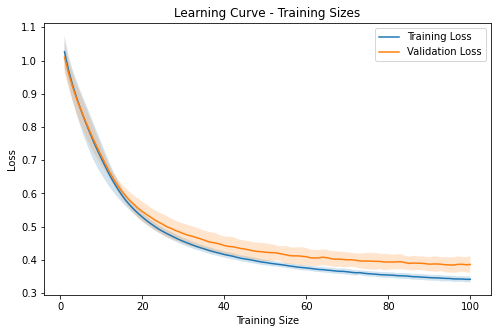

In [29]:
plt.figure(figsize=(8, 5))

plt.plot(list(range(1, 101)), learning_all[-1]['history']['loss']['mean'], label='Training Loss', )
plt.plot(list(range(1, 101)), learning_all[-1]['history']['val_loss']['mean'], label='Validation Loss', )

plt.fill_between(list(range(1, 101)), learning_all[-1]['history']['loss']['mean'] - learning_all[-1]['history']['loss']['std'], learning_all[-1]['history']['loss']['mean'] + learning_all[-1]['history']['loss']['std'], alpha=0.2)
plt.fill_between(list(range(1, 101)), learning_all[-1]['history']['val_loss']['mean'] - learning_all[-1]['history']['val_loss']['std'], learning_all[-1]['history']['val_loss']['mean'] + learning_all[-1]['history']['val_loss']['std'], alpha=0.2)

plt.title("Learning Curve - Training Sizes")
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()

plt.show()

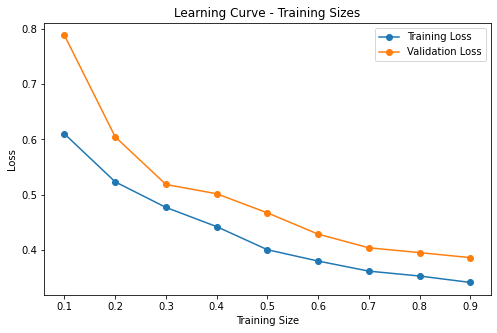

In [30]:
plt.figure(figsize=(8, 5))

plt.plot(training_sizes, [learning['history']['loss']['mean'][-1] for learning in learning_all], label='Training Loss', marker='o')
plt.plot(training_sizes, [learning['history']['val_loss']['mean'][-1] for learning in learning_all], label='Validation Loss', marker='o')

plt.title("Learning Curve - Training Sizes")
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def create_model(u1, u2, learning_rate):
    model = Sequential([
        Dense(u1, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(u2, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# hyperparameter ranges
units1 = [32, 16]
units2 = [16, 8]
epoch_list = [50, 100]
batch_size_list = [32, 64]
learning_rate_list = [0.001, 0.01]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

performance_all = []

_X_train = pd.DataFrame(_X_train)

# search
for u1 in units1:
    for u2 in units2:
        for epochs in epoch_list:
            for batch_size in batch_size_list:
                for learning_rate in learning_rate_list:
                    
                    print(f"u1:{u1}, u2:{u2}, epochs:{epochs}, batch_size:{batch_size}, learning_rate:{learning_rate}")
                    
                    train_losses = []
                    val_losses = []
                    
                    train_accuracies = []
                    val_accuracies = []
                    
                    for train_index, val_index in kf.split(_X_train, _y_train):
                        X_train, X_val = _X_train.iloc[train_index], _X_train.iloc[val_index]
                        y_train, y_val = pd.DataFrame(_y_train).iloc[train_index], pd.DataFrame(_y_train).iloc[val_index]

                        # Create a model instance
                        model = create_model(u1, u2, learning_rate)

                        # Train the model
                        history = model.fit(X_train, y_train, 
                                            epochs=epochs, 
                                            batch_size=batch_size,
                                            validation_data=(X_val, y_val),
                                            verbose=0)

                        # Evaluate the model
                        val_predictions = model.predict(X_val, verbose=0)
                        
                        train_losses.append(history.history['loss'])
                        val_losses.append(history.history['val_loss'])

                        train_accuracies.append(history.history['accuracy'])
                        val_accuracies.append(history.history['val_accuracy'])
                        
                    performace_current = {'params':
                                          {
                                              'u1': u1,
                                              'u2': u2,
                                              'epochs': epochs,
                                              'batch_size': batch_size,
                                              'learning_rate': learning_rate,
                                          },
                                          
                                          'history':
                                          {
                                              'loss': {
                                                  'mean': np.mean(train_losses, axis=0),
                                                  'std': np.std(train_losses, axis=0)
                                              },
                                              'val_loss': {
                                                  'mean': np.mean(val_losses, axis=0),
                                                  'std': np.std(val_losses, axis=0)
                                              },
                                              'accuracy': {
                                                  'mean': np.mean(train_accuracies, axis=0),
                                                  'std': np.std(train_accuracies, axis=0)
                                              },
                                              'val_accuracy': {
                                                  'mean': np.mean(val_accuracies, axis=0),
                                                  'std': np.std(val_accuracies, axis=0)
                                              },
                                          }
                                         }
                        
                    performance_all.append(performace_current)

u1:32, u2:16, epochs:50, batch_size:32, learning_rate:0.001
u1:32, u2:16, epochs:50, batch_size:32, learning_rate:0.01
u1:32, u2:16, epochs:50, batch_size:64, learning_rate:0.001
u1:32, u2:16, epochs:50, batch_size:64, learning_rate:0.01
u1:32, u2:16, epochs:100, batch_size:32, learning_rate:0.001
u1:32, u2:16, epochs:100, batch_size:32, learning_rate:0.01
u1:32, u2:16, epochs:100, batch_size:64, learning_rate:0.001
u1:32, u2:16, epochs:100, batch_size:64, learning_rate:0.01
u1:32, u2:8, epochs:50, batch_size:32, learning_rate:0.001
u1:32, u2:8, epochs:50, batch_size:32, learning_rate:0.01
u1:32, u2:8, epochs:50, batch_size:64, learning_rate:0.001
u1:32, u2:8, epochs:50, batch_size:64, learning_rate:0.01
u1:32, u2:8, epochs:100, batch_size:32, learning_rate:0.001
u1:32, u2:8, epochs:100, batch_size:32, learning_rate:0.01
u1:32, u2:8, epochs:100, batch_size:64, learning_rate:0.001
u1:32, u2:8, epochs:100, batch_size:64, learning_rate:0.01
u1:16, u2:16, epochs:50, batch_size:32, learning

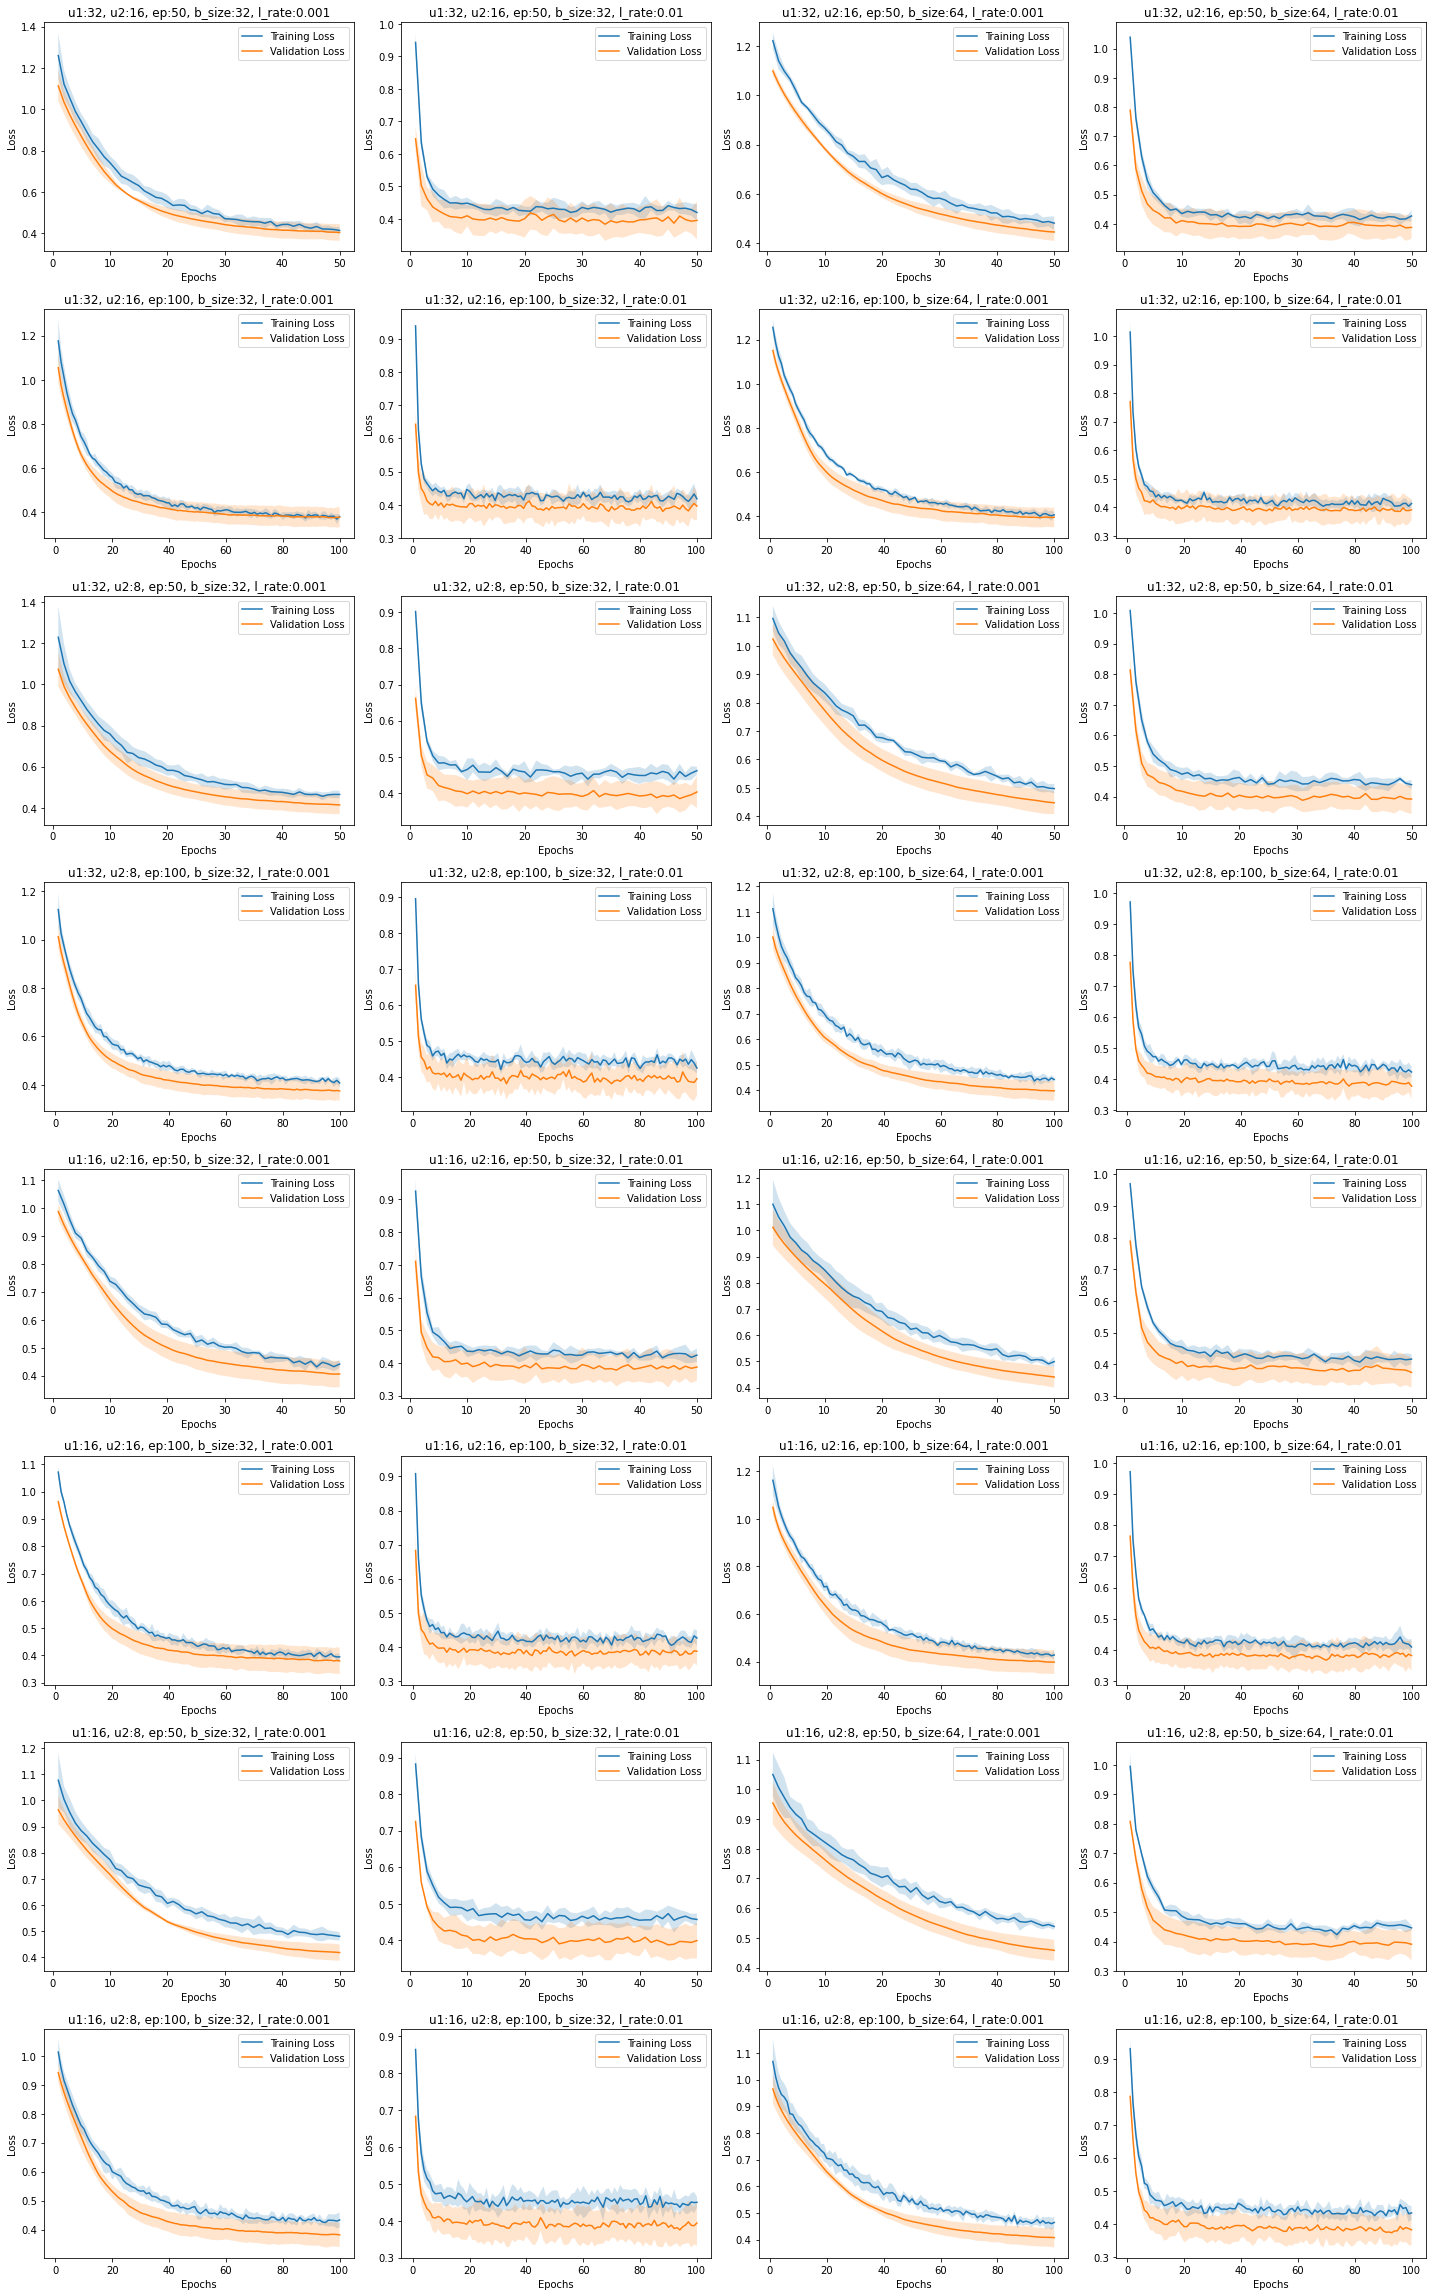

In [32]:
# Plot training & validation loss values
fig, axes = plt.subplots(int(len(performance_all)/4), 4, figsize=(20, int(len(performance_all)/4)*4))

axes = axes.flatten()

for ax, (i, performance) in zip(axes, enumerate(performance_all)):
    
    n = performance['params']['epochs']
    
    ax.plot(list(range(1, n+1)), performance['history']['loss']['mean'], label='Training Loss', )
    ax.plot(list(range(1, n+1)), performance['history']['val_loss']['mean'], label='Validation Loss', )
    
    ax.fill_between(list(range(1, n+1)), performance['history']['loss']['mean'] - performance['history']['loss']['std'], performance['history']['loss']['mean'] + performance['history']['loss']['std'], alpha=0.2)
    ax.fill_between(list(range(1, n+1)), performance['history']['val_loss']['mean'] - performance['history']['val_loss']['std'], performance['history']['val_loss']['mean'] + performance['history']['val_loss']['std'], alpha=0.2)
    
    ax.set_title(f"u1:{performance['params']['u1']}, u2:{performance['params']['u2']}, ep:{performance['params']['epochs']}, b_size:{performance['params']['batch_size']}, l_rate:{performance['params']['learning_rate']}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()
plt.show()

In [33]:
pt_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'][-1],
        'val_loss': p['history']['val_loss']['mean'][-1],
        'accuracy': p['history']['accuracy']['mean'][-1],
        'val_accuracy': p['history']['val_accuracy']['mean'][-1],
    }, 
    performance_all
)))

pt_results_df.loc[
    list(set(pt_results_df.sort_values(['val_loss', 'val_accuracy'], ascending=[True, False]).head(10).index).intersection(
        set(pt_results_df.sort_values(['val_accuracy', 'val_loss'], ascending=[False, True]).head(10).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,accuracy,val_accuracy
4,32,16,100,32,0.001,0.378811,0.376119,0.880727,0.873583
12,32,8,100,32,0.001,0.407655,0.374292,0.862760,0.873599
17,16,16,50,32,0.010,0.423661,0.387296,0.852543,0.876075
19,16,16,50,64,0.010,0.416295,0.374249,0.857494,0.877279
28,16,8,100,32,0.001,0.433202,0.381417,0.857182,0.878522
31,16,8,100,64,0.010,0.433436,0.382069,0.842313,0.872349


In [34]:
pt_best_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'].min(),
        'val_loss': p['history']['val_loss']['mean'].min(),
        'accuracy': p['history']['accuracy']['mean'].max(),
        'val_accuracy': p['history']['val_accuracy']['mean'].max(),
    }, 
    performance_all
)))

pt_best_results_df.loc[
    list(set(pt_best_results_df.sort_values(['val_loss', 'val_accuracy'], ascending=[True, False]).head(10).index).intersection(
        set(pt_best_results_df.sort_values(['val_accuracy', 'val_loss'], ascending=[False, True]).head(10).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,accuracy,val_accuracy
4,32,16,100,32,0.001,0.368009,0.374259,0.883207,0.878545
15,32,8,100,64,0.010,0.422374,0.376993,0.859662,0.881006
19,16,16,50,64,0.010,0.406865,0.374249,0.864310,0.878552
23,16,16,100,64,0.010,0.407510,0.366789,0.864305,0.878529
29,16,8,100,32,0.010,0.436515,0.375468,0.848821,0.879787


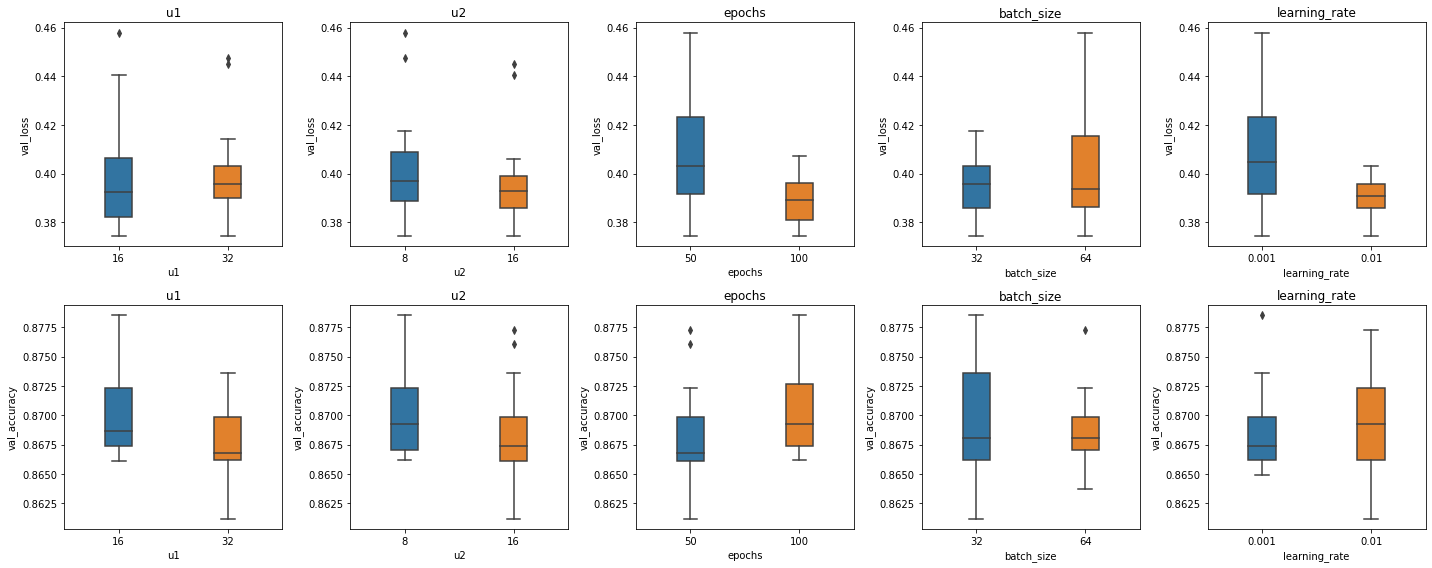

In [35]:
fig, axes = plt.subplots(
                nrows=2, 
                ncols=5, 
                figsize=(20, 8)
            )

axes = axes.flatten()

for i, metric in enumerate(['val_loss', 'val_accuracy']):
    for j, col in enumerate(pt_results_df.columns[:5]):
        sns.boxplot(data=pt_results_df, x=col, y=metric, ax=axes[(i*5)+j], width=0.25)
        axes[(i*5)+j].set_title(col)

plt.tight_layout()
plt.show()

### AUC

In [36]:
from sklearn.metrics import make_scorer, roc_auc_score

In [61]:
grid_params = ParameterGrid(
    {
        'weights': ['distance'],
        'p': [1, 2],
    }
)

grid_params = list(grid_params)

range_params = {
    'n_neighbors': list(range(3, 50))
}

In [62]:
grid_params

[{'p': 1, 'weights': 'distance'}, {'p': 2, 'weights': 'distance'}]

In [63]:
scorer = make_scorer(roc_auc_score)

validation_results = []

for gp in grid_params:
    for rp in range_params.keys():
        knn = KNeighborsClassifier(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            knn, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

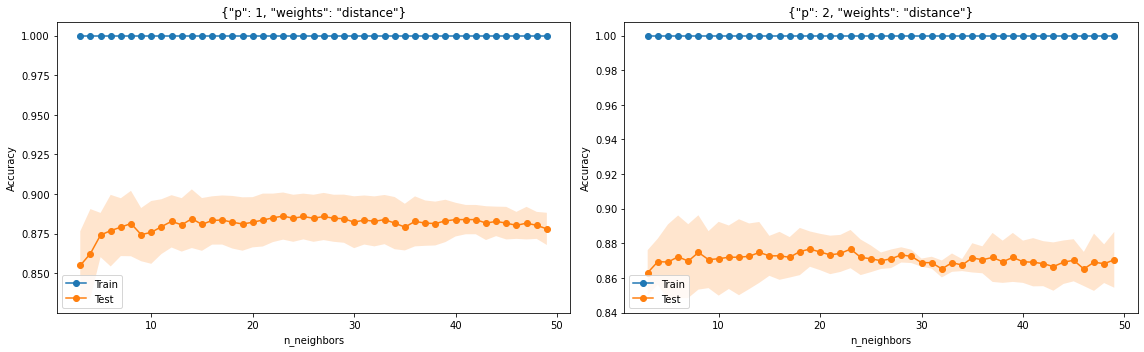

In [64]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()

In [65]:
grid_params = list(ParameterGrid({'kernel': ['rbf', 'poly']})) # + list(ParameterGrid({'kernel': ['poly'], 'degree': [3]}))

range_params = {
    'C': np.power(10, np.linspace(-3, 3, 7)),
    'gamma': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
}

validation_results = []

In [66]:
grid_params

[{'kernel': 'rbf'}, {'kernel': 'poly'}]

In [67]:
for gp in grid_params:
    for rp in range_params.keys():
        svc = SVC(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            svc, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

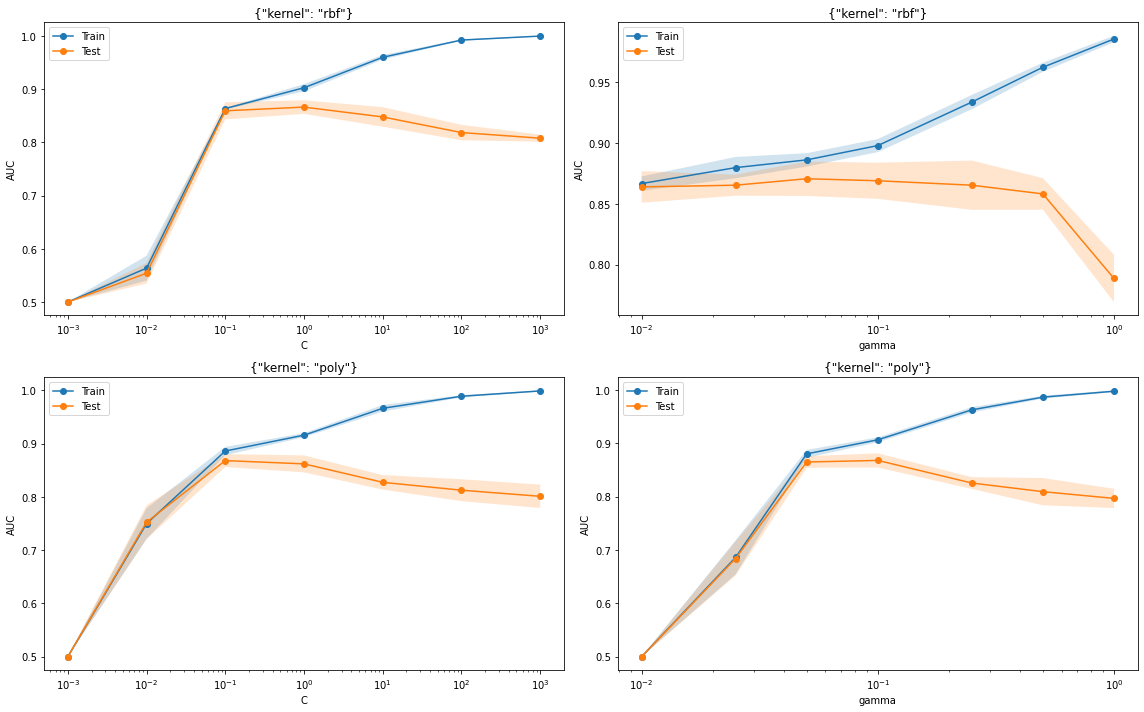

In [68]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xscale('log')
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('AUC')
    ax.legend()

plt.tight_layout()
plt.show()

In [70]:
def create_model(u1, u2, learning_rate):
    model = Sequential([
        Dense(u1, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(u2, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['AUC'])
    
    return model

# Define hyperparameter ranges
param_combos = [
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.001},
]

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_performance_all = []

# Perform grid search
for params in param_combos:

    print(f"{json.dumps(params)}")

    train_losses = []
    val_losses = []

    train_aucs = []
    val_aucs = []

    for train_index, val_index in kf.split(_X_train, _y_train):
        X_train, X_val = _X_train.iloc[train_index], _X_train.iloc[val_index]
        y_train, y_val = pd.DataFrame(_y_train).iloc[train_index], pd.DataFrame(_y_train).iloc[val_index]

        # Create a model instance
        model = create_model(params['u1'], params['u2'], params['learning_rate'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train, y_train, 
                            epochs=params['epochs'], 
                            batch_size=params['batch_size'],
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping],
                            verbose=0)

        # Evaluate the model
        val_predictions = model.predict(X_val, verbose=0)

        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])

        train_aucs.append(history.history['auc'])
        val_aucs.append(history.history['val_auc'])
        
    train_losses = [arr + [arr[-1]]*(len(max(train_losses, key=len)) - len(arr)) for arr in train_losses]
    
    val_losses = [arr + [arr[-1]]*(len(max(val_losses, key=len)) - len(arr)) for arr in val_losses]
    
    train_aucs = [arr + [arr[-1]]*(len(max(train_aucs, key=len)) - len(arr)) for arr in train_aucs]
    
    val_aucs = [arr + [arr[-1]]*(len(max(val_aucs, key=len)) - len(arr)) for arr in val_aucs]
    
    performace_current = {
        'params': params,

        'history':
            {
              'loss': {
                  'mean': np.mean(train_losses, axis=0),
                  'std': np.std(train_losses, axis=0)
              },
              'val_loss': {
                  'mean': np.mean(val_losses, axis=0),
                  'std': np.std(val_losses, axis=0)
              },
              'auc': {
                  'mean': np.mean(train_aucs, axis=0),
                  'std': np.std(train_aucs, axis=0)
              },
              'val_auc': {
                  'mean': np.mean(val_aucs, axis=0),
                  'std': np.std(val_aucs, axis=0)
              },
            }
        }

    auc_performance_all.append(performace_current)

{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 32, "learning_rate": 0.01}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 32, "learning_rate": 0.001}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 64, "learning_rate": 0.01}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 64, "learning_rate": 0.001}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 32, "learning_rate": 0.01}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 32, "learning_rate": 0.001}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 64, "learning_rate": 0.01}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 64, "learning_rate": 0.001}


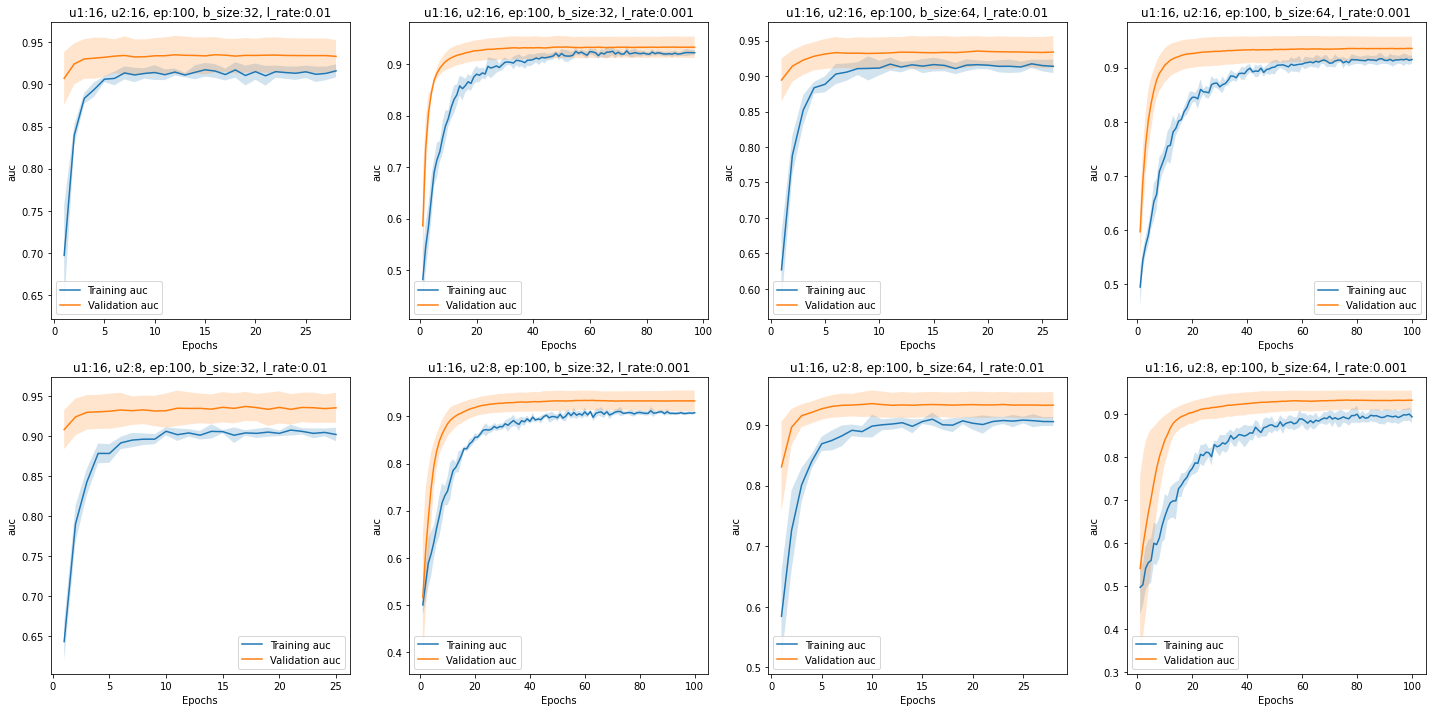

In [111]:
# Plot training & validation auc values
fig, axes = plt.subplots(int(len(auc_performance_all)/4), 4, figsize=(20, int(len(auc_performance_all)/4)*5))

axes = axes.flatten()

for ax, (i, performance) in zip(axes, enumerate(auc_performance_all)):
    
    n = len(performance['history']['auc']['mean'])
    
    ax.plot(list(range(1, n+1)), performance['history']['auc']['mean'], label='Training auc', )
    ax.plot(list(range(1, n+1)), performance['history']['val_auc']['mean'], label='Validation auc', )
    
    ax.fill_between(list(range(1, n+1)), performance['history']['auc']['mean'] - performance['history']['auc']['std'], performance['history']['auc']['mean'] + performance['history']['auc']['std'], alpha=0.2)
    ax.fill_between(list(range(1, n+1)), performance['history']['val_auc']['mean'] - performance['history']['val_auc']['std'], performance['history']['val_auc']['mean'] + performance['history']['val_auc']['std'], alpha=0.2)
    
    ax.set_title(f"u1:{performance['params']['u1']}, u2:{performance['params']['u2']}, ep:{performance['params']['epochs']}, b_size:{performance['params']['batch_size']}, l_rate:{performance['params']['learning_rate']}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('auc')
    ax.legend()

plt.tight_layout()
plt.show()

In [112]:
auc_pt_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'][-1],
        'val_loss': p['history']['val_loss']['mean'][-1],
        'auc': p['history']['auc']['mean'][-1],
        'val_auc': p['history']['val_auc']['mean'][-1],
    }, 
    auc_performance_all
)))

auc_pt_results_df.loc[
    list(set(auc_pt_results_df.sort_values(['val_loss', 'val_auc'], ascending=[True, False]).head(3).index).intersection(
        set(auc_pt_results_df.sort_values(['val_auc', 'val_loss'], ascending=[False, True]).head(3).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,auc,val_auc
4,16,8,100,32,0.01,0.453989,0.38797,0.902044,0.93548


In [113]:
auc_pt_best_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'].min(),
        'val_loss': p['history']['val_loss']['mean'].min(),
        'auc': p['history']['auc']['mean'].max(),
        'val_auc': p['history']['val_auc']['mean'].max(),
    }, 
    auc_performance_all
)))

auc_pt_best_results_df.loc[
    list(set(auc_pt_best_results_df.sort_values(['val_loss', 'val_auc'], ascending=[True, False]).head(3).index).intersection(
        set(auc_pt_best_results_df.sort_values(['val_auc', 'val_loss'], ascending=[False, True]).head(3).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,auc,val_auc
0,16,16,100,32,0.01,0.422752,0.385388,0.917447,0.935268
4,16,8,100,32,0.01,0.445952,0.383501,0.907620,0.937171


In [114]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', p=2)
knn.fit(_X_train, _y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [115]:
svc = SVC(kernel='poly', C=1, gamma=0.1)
svc.fit(_X_train, _y_train)

SVC(C=1, gamma=0.1, kernel='poly')

In [116]:
import time

from tensorflow.keras.callbacks import Callback

class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)

nnet = Sequential([
    Dense(16, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nnet.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['AUC'])

time_callback = TimeHistory()
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = nnet.fit(_X_train, _y_train,
                   epochs=100,
                   batch_size=32,
                   callbacks=[time_callback, early_stopping],
                   verbose=0)

times = time_callback.times

In [117]:
predictions = {
    'knn': knn.predict(X_test),
    'svc': svc.predict(X_test),
    'nnet': np.round(nnet.predict(X_test, verbose=0)).astype(int).flatten()
}

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn


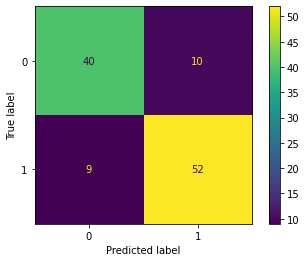

svc


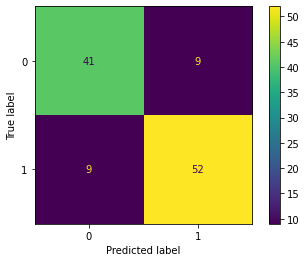

nnet


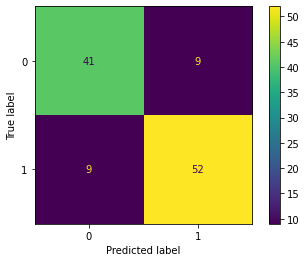

In [119]:
for clf in  predictions.keys():
    print(clf)
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions[clf], labels=np.array([0, 1])),
                           display_labels=np.array([0, 1])
                          ).plot()

    plt.show()

In [120]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [121]:
pd.DataFrame(
    [
        {
            'accuracy_score': accuracy_score(y_test, predictions[clf]),
            'roc_auc_score': roc_auc_score(y_test, predictions[clf]),
            'f1_score': f1_score(y_test, predictions[clf]),
            'precision_score': precision_score(y_test, predictions[clf]),
            'recall_score': recall_score(y_test, predictions[clf])
        }
        
        for clf in predictions.keys()
    ],
    index=list(predictions.keys())
) # .style.highlight_max(color='lightgreen', axis=0)

,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score
knn,0.828829,0.82623,0.845528,0.838710,0.852459
svc,0.837838,0.83623,0.852459,0.852459,0.852459
nnet,0.837838,0.83623,0.852459,0.852459,0.852459


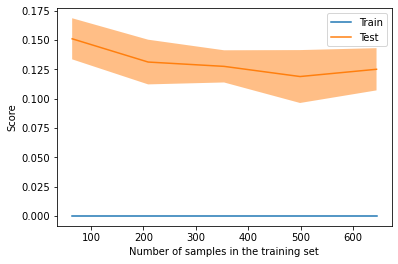

In [122]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=9, weights='distance', p=2), _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Score"
)

display.plot()

plt.show()

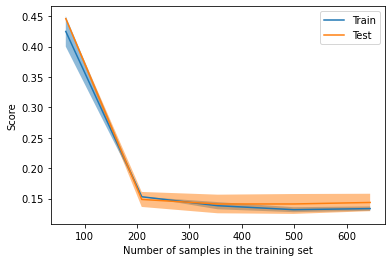

In [123]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=0.1, gamma=0.05), _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Score"
)

display.plot()

plt.show()

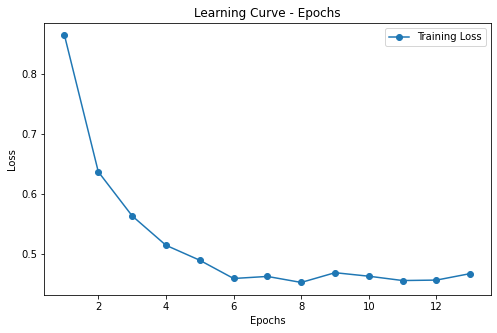

In [124]:
plt.figure(figsize=(8, 5))

plt.plot(list(range(1, len(history.history['loss'])+1)), history.history['loss'], label='Training Loss', marker='o')

plt.title("Learning Curve - Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()